# **Heart Disease Classification Through Sound**
The project **"Heart Disease Classification Through Sound using LSTM"** involves analyzing heart sound recordings (phonocardiograms) to detect abnormalities. It uses a **Long Short-Term Memory (LSTM)** neural network to learn temporal patterns in the audio signals and classify them as **normal or indicative of heart disease**. This approach helps in early diagnosis by providing an intelligent, non-invasive, and automated screening tool.


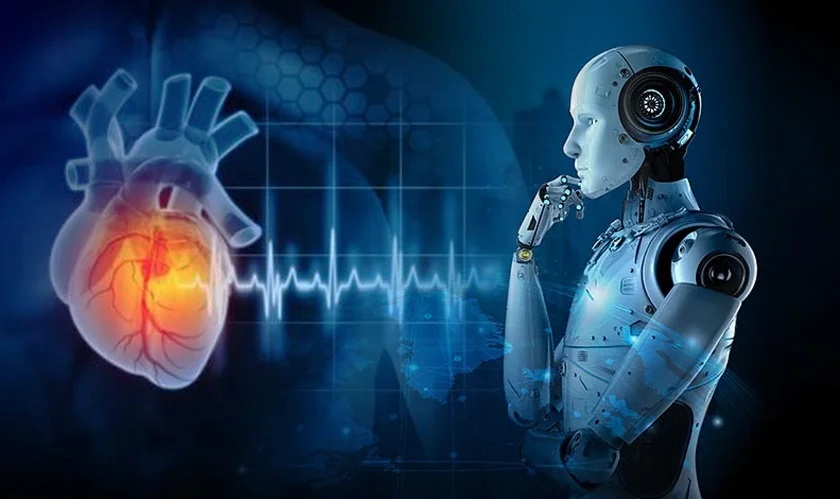

## **Loading Audio Files From Dataset**

In [1]:

import numpy as np # linear algebra
import os
for dirname, _, filenames in os.walk("C:\\Users\\HOME\\Desktop\\Heart Sounds\\Heart_sound_dataset"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\HOME\Desktop\Heart Sounds\Heart_sound_dataset\AS_New\New_AS_001.wav
C:\Users\HOME\Desktop\Heart Sounds\Heart_sound_dataset\AS_New\New_AS_001_aug1.wav
C:\Users\HOME\Desktop\Heart Sounds\Heart_sound_dataset\AS_New\New_AS_001_aug2.wav
C:\Users\HOME\Desktop\Heart Sounds\Heart_sound_dataset\AS_New\New_AS_001_aug3.wav
C:\Users\HOME\Desktop\Heart Sounds\Heart_sound_dataset\AS_New\New_AS_001_aug4.wav
C:\Users\HOME\Desktop\Heart Sounds\Heart_sound_dataset\AS_New\New_AS_001_aug5.wav
C:\Users\HOME\Desktop\Heart Sounds\Heart_sound_dataset\AS_New\New_AS_001_aug6.wav
C:\Users\HOME\Desktop\Heart Sounds\Heart_sound_dataset\AS_New\New_AS_001_aug7.wav
C:\Users\HOME\Desktop\Heart Sounds\Heart_sound_dataset\AS_New\New_AS_002.wav
C:\Users\HOME\Desktop\Heart Sounds\Heart_sound_dataset\AS_New\New_AS_002_aug1.wav
C:\Users\HOME\Desktop\Heart Sounds\Heart_sound_dataset\AS_New\New_AS_002_aug2.wav
C:\Users\HOME\Desktop\Heart Sounds\Heart_sound_dataset\AS_New\New_AS_002_aug3.wav
C:\Users\HOME\Desktop\Hear

# **Dataset Preperation**


The dataset consists of 8000 data points belong to five classes. They are as follows,
* AS - Aortic Stenosis
* MR - Mitral Regergitation
* MS - Mitral Stenosis
* MVP - Mitral Valve Prolapse
* N - Normal

Each class includes 1600 datapoints and It's well balanced.
# **Import Libraries**



In [2]:
import os
import librosa.util
import librosa
from IPython import display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf
import tensorflow_hub as hub


import random
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from IPython.display import Audio as ipd
from IPython.display import Audio



In [3]:
data_path = "C:\\Users\\HOME\\Desktop\\Heart Sounds\\Heart_sound_dataset"
print(os.listdir(data_path))

['AS_New', 'MR_New', 'MS_New', 'MVP_New', 'N_New']


In [4]:
tarin_data      = data_path 
AS_data    = data_path  + "/AS_New/"

MR_data     = tarin_data + '/MR_New/'
MS_data     = tarin_data + '/MS_New/'
MVP_data = tarin_data + '/MVP_New/'
N_data   = tarin_data + '/N_New/'


In [5]:
print("Arotic Stenosis files:", len(os.listdir(AS_data))) #length of normal training sounds
print("Mitral Regergitation files:",len(os.listdir(MR_data))) #length of murmur training sounds 
print("Mitral Stenosis", len(os.listdir(MS_data))) #length of extrastole training sounds 
print("Mitral Valve Prolapse:",len(os.listdir(MVP_data))) #length of artifact training sounds 
print("Normal:",len(os.listdir(N_data))) #length of extrahls training sounds 

print('TOTAL TRAIN SOUNDS:', len(os.listdir(AS_data)) 
                              + len(os.listdir(MR_data ))
                              + len(os.listdir(MS_data))
                              + len(os.listdir(MVP_data))
                              + len(os.listdir(N_data)))

Arotic Stenosis files: 1600
Mitral Regergitation files: 1600
Mitral Stenosis 1600
Mitral Valve Prolapse: 1600
Normal: 1600
TOTAL TRAIN SOUNDS: 8000


# **EDA and Data Visualization**

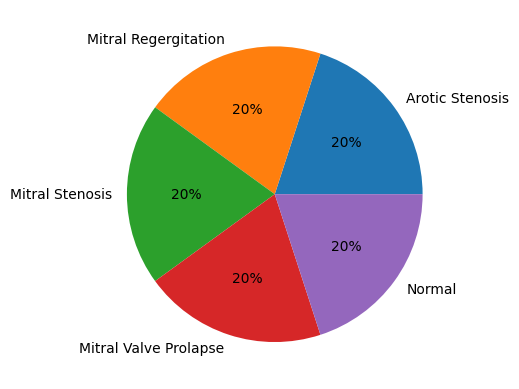

In [6]:
x = np.array([len(os.listdir(AS_data)),
              len(os.listdir(MR_data)),
              len(os.listdir(MS_data)),
              len(os.listdir(MVP_data)),
              len(os.listdir(N_data))])
labels = ['Arotic Stenosis', 'Mitral Regergitation', 'Mitral Stenosis', 'Mitral Valve Prolapse', 'Normal']
plt.pie(x, labels = labels, autopct = '%.0f%%', radius= 1, textprops={'fontsize': 10})
plt.show()


##### The figure shows the Balance data 
##### Each class includes 1600 datapoints and It's well balanced.

In [7]:
# Listen to rondom audio from specific class
def random_sound (audio_class):
    random_sound = np.random.randint(0,len(os.listdir(audio_class))) 
    sound = os.listdir(audio_class)[random_sound]
    sound = audio_class+sound
    sound,sample_rate = librosa.load(sound)
    return ipd.Audio(sound,rate=sample_rate),sound

In [8]:
# show waveform of audio from dataset 
# X axis, represents time.
# Y-axis measures displacement of air molecules.
# This is where amplitude comes in. It measures how much a molecule is displaced from its resting position.  
def show_audio_waveform(audio_sample):
    plt.figure(figsize=(20,5))
    librosa.display.waveplot(audio_sample, sr = 22050)
#     plt.title("Sound")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.show()

In [9]:
# show spectrum of audio from dataset 
def show_audio_spectrum(audio_sample):
    sample_rate = 22050
    fft_normal = np.fft.fft(audio_sample)
    magnitude_normal = np.abs(fft_normal)
    freq_normal = np.linspace(0,sample_rate, len(magnitude_normal)) 
    half_freq = freq_normal[:int(len(freq_normal)/2)]
    half_magnitude = magnitude_normal[:int(len(freq_normal)/2)]

    plt.figure(figsize=(6,5))
    plt.plot(half_freq,half_magnitude)
    plt.title("Spectrum")
    plt.xlabel("Frequency")
    plt.ylabel("Magnitude")
    plt.show()

In [10]:
# show specrogram of audio from dataset 
# the output is an image that represents a sound. 
# X-axis is for time, y-axis is for frequency and the color is for intensity
def show_spectrogram (audio_sample):    
    # STFT -> spectrogram
    hop_length = 512 # in num. of samples
    n_fft = 2048 # window in num. of samples
    sample_rate = 22050

    # calculate duration hop length and window in seconds
    hop_length_duration = float(hop_length)/sample_rate
    n_fft_duration = float(n_fft)/sample_rate

    print("STFT hop length duration is: {}s".format(hop_length_duration))
    print("STFT window duration is: {}s".format(n_fft_duration))

    # perform stft
    stft_normal = librosa.stft(audio_sample, n_fft=n_fft, hop_length=hop_length)

    # calculate abs values on complex numbers to get magnitude
    spectrogram = np.abs(stft_normal)
    log_spectrogram = librosa.amplitude_to_db(spectrogram)

    # display spectrogram
    plt.figure(figsize=(6,5))
    librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
    plt.xlabel("Time")
    plt.ylabel("Frequency")
    plt.colorbar()
    #plt.set_cmap("YlOrBr")
    plt.title("Spectrogram")

In [11]:
# MFCCs
# extract 52 MFCCs
def show_mfcc_features(audio_sample):
    hop_length = 512 # in num. of samples
    n_fft = 2048 # window in num. of samples
    sample_rate = 22050
    
    MFCCs = librosa.feature.mfcc(y=audio_sample, sr=sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=52)

    # display MFCCs
    plt.figure(figsize=(6,5))
    librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
    plt.xlabel("Time")
    plt.ylabel("MFCC coefficients")
    plt.colorbar()
    plt.title("MFCCs")
    plt.show()

## DataSet Classes

#### 1. Aortic Stenosis 

In [12]:
from IPython.display import Audio  # Correct import
import librosa
import os
import numpy as np

# Listen to random audio from a specific class
def random_sound(audio_class):
    random_sound = np.random.randint(0, len(os.listdir(audio_class))) 
    sound = os.listdir(audio_class)[random_sound]
    sound = os.path.join(audio_class, sound)  
    sound, sample_rate = librosa.load(sound)
    return Audio(sound, rate=sample_rate), sound

 # AS_data is  folder path containing audio files
random_audio, sound_file = random_sound('C:\\Users\\HOME\\Desktop\\Heart Sounds\\Heart_sound_dataset\\AS_New')  # Replace with your actual folder path
random_audio  # This will display the audio player in the notebook


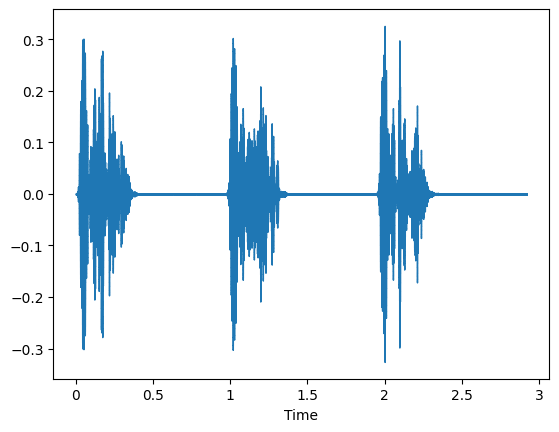

In [13]:
librosa.display.waveshow(sound_file)

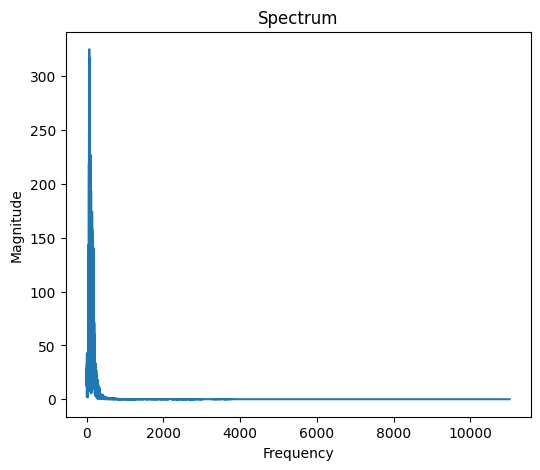

In [14]:
show_audio_spectrum(sound_file)

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


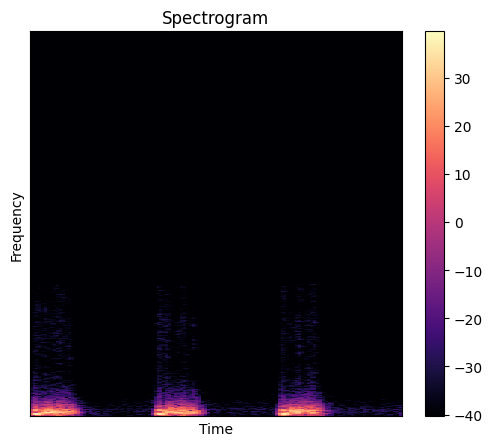

In [15]:
show_spectrogram(sound_file)

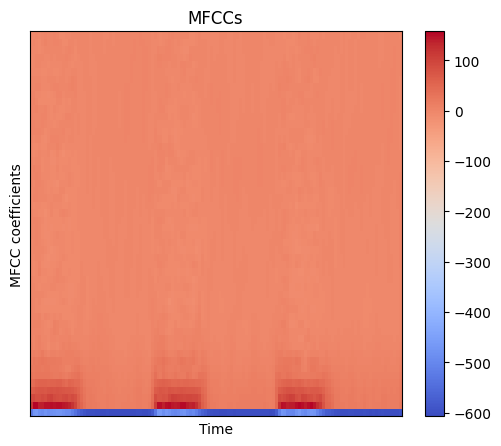

In [16]:
show_mfcc_features(sound_file)

#### 2. Mitral Regergitation

In [17]:
from IPython.display import Audio 
import librosa
import os
import numpy as np

# Listen to random audio from a specific class
def random_sound(audio_class):
    random_sound = np.random.randint(0, len(os.listdir(audio_class))) 
    sound = os.listdir(audio_class)[random_sound]
    sound = os.path.join(audio_class, sound)  
    sound, sample_rate = librosa.load(sound)
    return Audio(sound, rate=sample_rate), sound

#Assuming MR_data is  folder path containing audio files
random_audio, MR_sound_file = random_sound('C:\\Users\\HOME\\Desktop\\Heart Sounds\\Heart_sound_dataset\\MR_New')  
random_audio  # This will display the audio player in the notebook


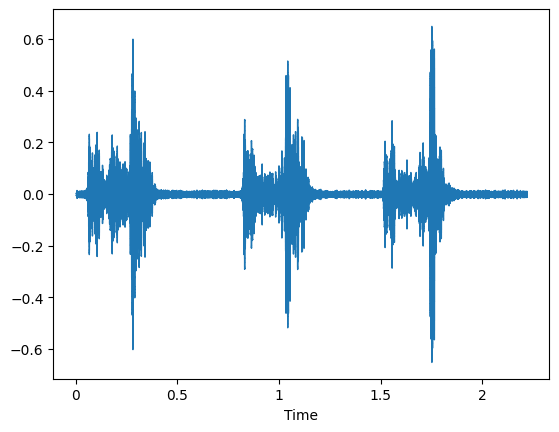

In [18]:
librosa.display.waveshow(MR_sound_file)

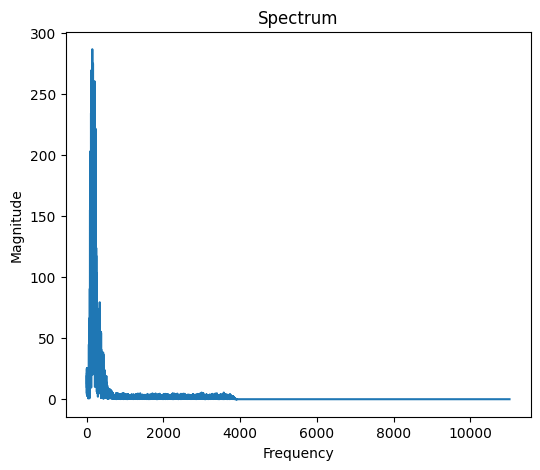

In [19]:
show_audio_spectrum(MR_sound_file)

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


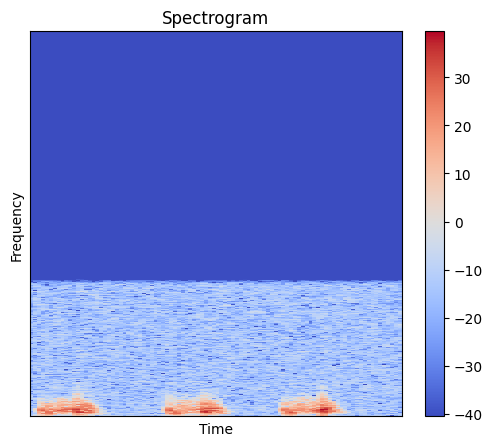

In [20]:
show_spectrogram(MR_sound_file)

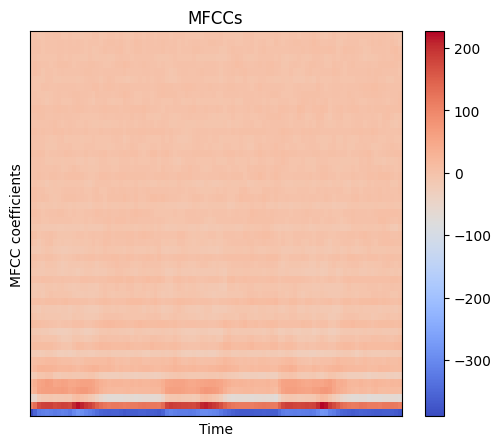

In [21]:
show_mfcc_features(MR_sound_file)

#### 3. Mitral Stenosis

In [22]:
from IPython.display import Audio  
import librosa
import os
import numpy as np

# Listen to random audio from a specific class
def random_sound(audio_class):
    random_sound = np.random.randint(0, len(os.listdir(audio_class))) 
    sound = os.listdir(audio_class)[random_sound]
    sound = os.path.join(audio_class, sound)  # Join the path correctly
    sound, sample_rate = librosa.load(sound)
    return Audio(sound, rate=sample_rate), sound

# Assuming MS_data is  folder path containing audio files
random_audio, MS_sound_file = random_sound('C:\\Users\\HOME\\Desktop\\Heart Sounds\\Heart_sound_dataset\\MS_New')  # Replace with your actual folder path
random_audio  # This will display the audio player in the notebook


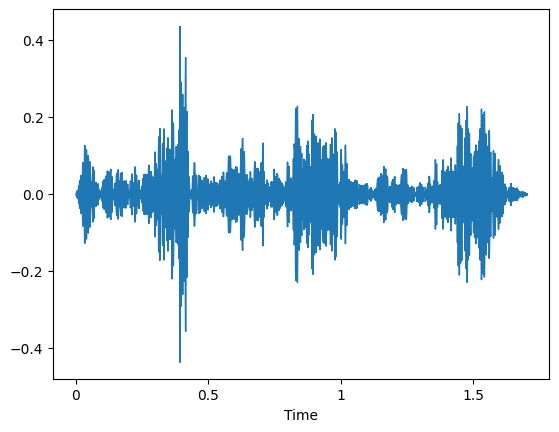

In [23]:
librosa.display.waveshow(MS_sound_file)

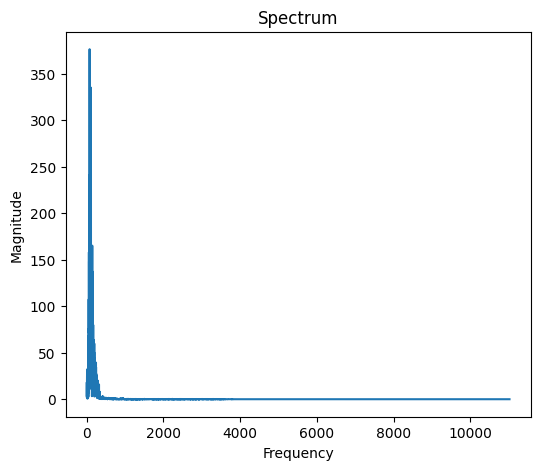

In [24]:
show_audio_spectrum(MS_sound_file)

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


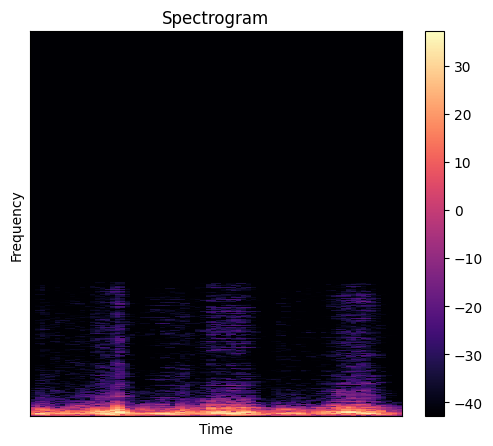

In [25]:
show_spectrogram(MS_sound_file)

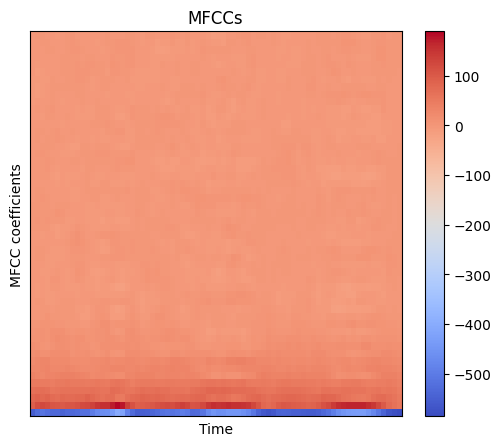

In [26]:
show_mfcc_features(MS_sound_file)

#### 4. Mitral Valve Prolapse

In [27]:
from IPython.display import Audio 
import librosa
import os
import numpy as np

# Listen to random audio from a specific class
def random_sound(audio_class):
    random_sound = np.random.randint(0, len(os.listdir(audio_class))) 
    sound = os.listdir(audio_class)[random_sound]
    sound = os.path.join(audio_class, sound)  
    sound, sample_rate = librosa.load(sound)
    return Audio(sound, rate=sample_rate), sound

#  Assuming MVP_data is  folder path containing audio files
random_audio, MVP_sound_file = random_sound('C:\\Users\\HOME\\Desktop\\Heart Sounds\\Heart_sound_dataset\\MVP_New')  # Replace with your actual folder path
random_audio  # This will display the audio player in the notebook


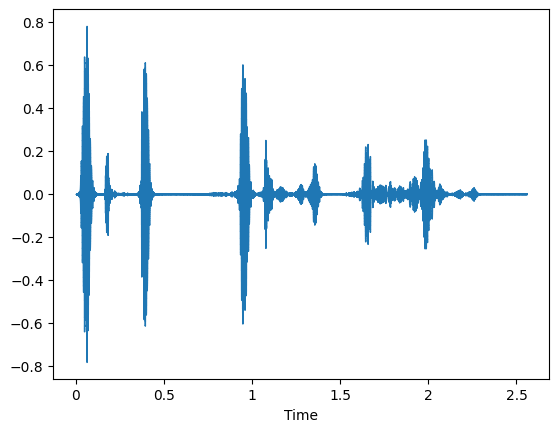

In [28]:
librosa.display.waveshow(MVP_sound_file)

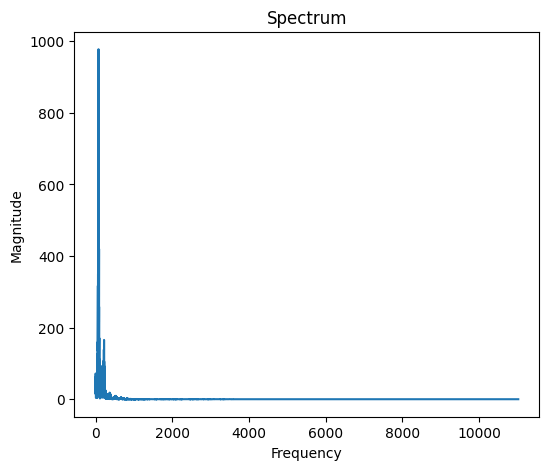

In [29]:
show_audio_spectrum(MVP_sound_file)

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


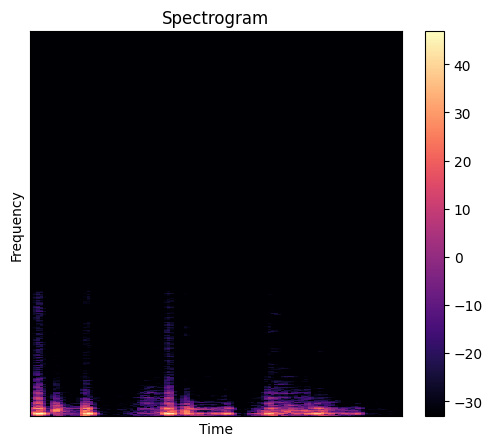

In [30]:
show_spectrogram(MVP_sound_file)

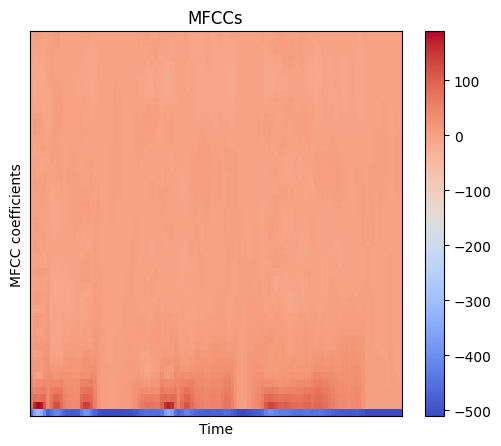

In [31]:
show_mfcc_features(MVP_sound_file)

#### 5. Normal

In [32]:
from IPython.display import Audio  
import librosa
import os
import numpy as np

# Listen to random audio from a specific class
def random_sound(audio_class):
    random_sound = np.random.randint(0, len(os.listdir(audio_class))) 
    sound = os.listdir(audio_class)[random_sound]
    sound = os.path.join(audio_class, sound)  # Join the path correctly
    sound, sample_rate = librosa.load(sound)
    return Audio(sound, rate=sample_rate), sound

# Assuming N_data is  folder path containing audio files
random_audio, N_sound_file = random_sound('C:\\Users\\HOME\\Desktop\\Heart Sounds\\Heart_sound_dataset\\N_New')  # Replace with your actual folder path
random_audio  # This will display the audio player in the notebook


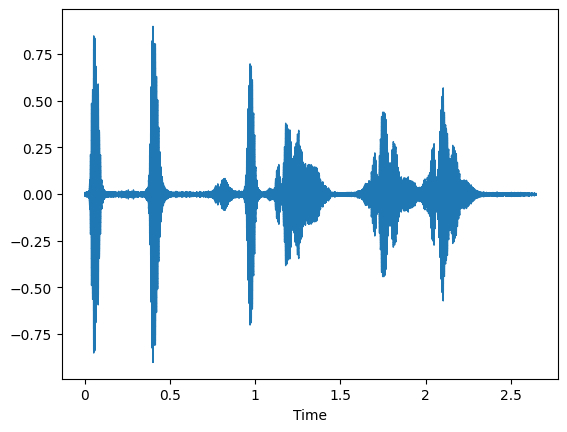

In [33]:
librosa.display.waveshow(N_sound_file)

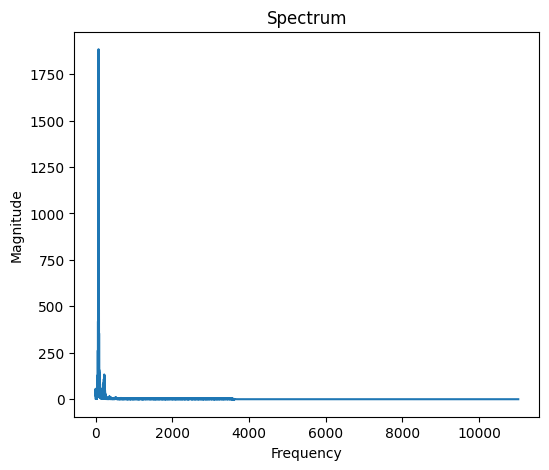

In [34]:
show_audio_spectrum(N_sound_file)

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


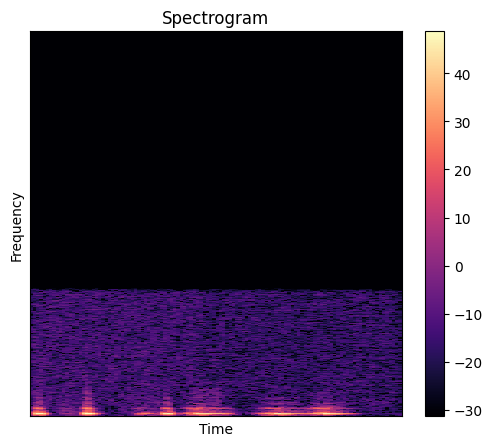

In [35]:
show_spectrogram(N_sound_file)

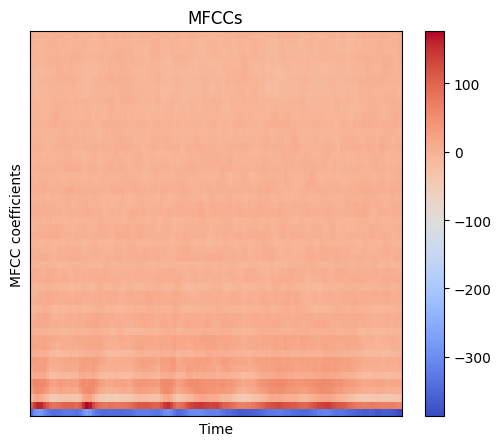

In [36]:
show_mfcc_features(N_sound_file)

# Data Augmentation and feature Extraction

In [37]:
def add_noise(data,x):
    noise = np.random.randn(len(data))
    data_noise = data + x * noise
    return data_noise

def shift(data,x):
    return np.roll(data, x)

def stretch(data, rate):
    data = librosa.effects.time_stretch(data, rate)
    return data

def pitch_shift (data , rate):
    data = librosa.effects.pitch_shift(data, sr=220250, n_steps=rate)
    return data

# Preprocess and load the Datapoints

In this step, all the datapoints are resampled to 16kHz and normalized. Label map is applied considering all the five classes. 

In [38]:
# Define the dataset directory
dataset_dir = "C:\\Users\\HOME\\Desktop\\Heart Sounds\\Heart_sound_dataset"

# Define the audio parameters
sr = 16000  # sampling rate

# Load the audio files and labels
audio_files = []
labels = []
for label in os.listdir(dataset_dir):
    label_dir = os.path.join(dataset_dir, label)
    if not os.path.isdir(label_dir):
        continue
    for audio_file in os.listdir(label_dir):
        if not audio_file.endswith('.wav'):
            continue
        audio_path = os.path.join(label_dir, audio_file)
        audio, _ = librosa.load(audio_path, sr=sr, mono=True)
        # Normalize the audio to have maximum absolute value of 1
        audio = librosa.util.normalize(audio)
        audio_files.append(audio)
        labels.append(label)

label_map = {
    "N_New" : 0,
    "AS_New" : 1,
    "MR_New" : 2,
    "MS_New" : 3,
    "MVP_New" : 4,
}

# Convert the original class labels to your desired labels using the dictionary
labels  = [label_map[label] for label in labels]

# Feature Extraction and train-test split
  

In [39]:
import librosa
import numpy as np
import os
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

# Function to extract MFCC features for LSTM
def extract_features(file_path, sr=22050, n_mfcc=40, max_pad_length=100):
    try:
        audio, sr = librosa.load(file_path, sr=sr)
        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
        
        # Pad/truncate to ensure all inputs have the same length
        if mfccs.shape[1] < max_pad_length:
            pad_width = max_pad_length - mfccs.shape[1]
            mfccs = np.pad(mfccs, ((0,0), (0, pad_width)), mode='constant')
        else:
            mfccs = mfccs[:, :max_pad_length]

        return mfccs.T  # Transpose to (timesteps, features)
    
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

# Path to dataset
dataset_path = "C:\\Users\\HOME\\Desktop\\Heart Sounds\\Heart_sound_dataset"  # Change this
labels_dict = {"N_New" : 0,
    "AS_New" : 1,
    "MR_New" : 2,
    "MS_New" : 3,
    "MVP_New" : 4,
}  # Modify based on your classes

# Extract features and labels
dataset = []
for label, idx in labels_dict.items():
    label_path = os.path.join(dataset_path, label)
    if os.path.exists(label_path):
        for file in os.listdir(label_path):
            file_path = os.path.join(label_path, file)
            features = extract_features(file_path)
            if features is not None:
                dataset.append([features, idx])

# Shuffle dataset
random.shuffle(dataset)

# Convert lists to numpy arrays
X = np.array([x[0] for x in dataset])  # Shape: (samples, timesteps, features)
y = np.array([x[1] for x in dataset])  # Class labels

# Convert labels to one-hot encoding
y = to_categorical(y, num_classes=len(labels_dict))

# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42, shuffle=True)

# Print dataset shape
print(f"Training Set: {X_train.shape}, Labels: {y_train.shape}")
print(f"Testing Set: {X_test.shape}, Labels: {y_test.shape}")


Training Set: (6400, 100, 40), Labels: (6400, 5)
Testing Set: (1600, 100, 40), Labels: (1600, 5)


# **LSTM Model Architecture and Training**

At the point we have the required feature vectors and target vectors with us. Here we have occupied a simple classification architecture with three dense layers and one dropout layer. We introduce non-linearity with Relu activation function at each dense layer. The purpose of using a 0.6 dropout is to make things harder for the model to predict classes. Model outputs an array of probability value of each class sums upto 1. We use Adam optimizer with categorical crossentropy loss function. In the training process we occupy Early Stopping to avoid overfitting the model with the training set.  

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define LSTM model
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(100, 40)),  # 100 timesteps, 40 features
    Dropout(0.3),
    LSTM(64, return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(len(labels_dict), activation='softmax')  # Output layer with 5 classes
])
model.summary()

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=8)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

# Save the trained model
model.save("heart_sound_lstm_model.h5")
print("Model saved successfully.")


c:\Users\HOME\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        86,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,181 (539.77 KB)

 Trainable params: 138,181 (539.77 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
800/800 ━━━━━━━━━━━━━━━━━━━━ 90s 106ms/step - accuracy: 0.5136 - loss: 1.1873 - val_accuracy: 0.8512 - val_loss: 0.4401
Epoch 2/15
800/800 ━━━━━━━━━━━━━━━━━━━━ 75s 94ms/step - accuracy: 0.8220 - loss: 0.5177 - val_accuracy: 0.8500 - val_loss: 0.4034
Epoch 3/15
800/800 ━━━━━━━━━━━━━━━━━━━━ 75s 93ms/step - accuracy: 0.8809 - loss: 0.3507 - val_accuracy: 0.9156 - val_loss: 0.2428
Epoch 4/15
800/800 ━━━━━━━━━━━━━━━━━━━━ 92s 116ms/step - accuracy: 0.8927 - loss: 0.3110 - val_accuracy: 0.9200 - val_loss: 0.2591
Epoch 5/15
800/800 ━━━━━━━━━━━━━━━━━━━━ 82s 103ms/step - accuracy: 0.9222 - loss: 0.2391 - val_accuracy: 0.9369 - val_loss: 0.1874
Epoch 6/15
800/800 ━━━━━━━━━━━━━━━━━━━━ 72s 89ms/step - accuracy: 0.9348 - loss: 0.1969 - val_accuracy: 0.9425 - val_loss: 0.1650
Epoch 7/15
800/800 ━━━━━━━━━━━━━━━━━━━━ 73s 91ms/step - accuracy: 0.9495 - loss: 0.1572 - val_accuracy: 0.9513 - val_loss: 0.1646
Epoch 8/15
800/800 ━━━━━━━━━━━━━━━━━━━━ 73s 92ms/step - accuracy: 0.9561 - loss: 0.1386

Test Accuracy: 0.98
Model saved successfully.


# **Evaluate the Performance**

The trained model is capable of classifying the heart sounds with more than 90% accuracy.

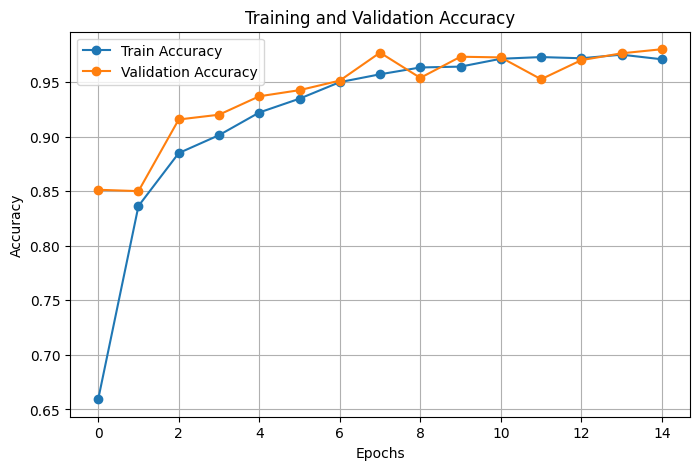

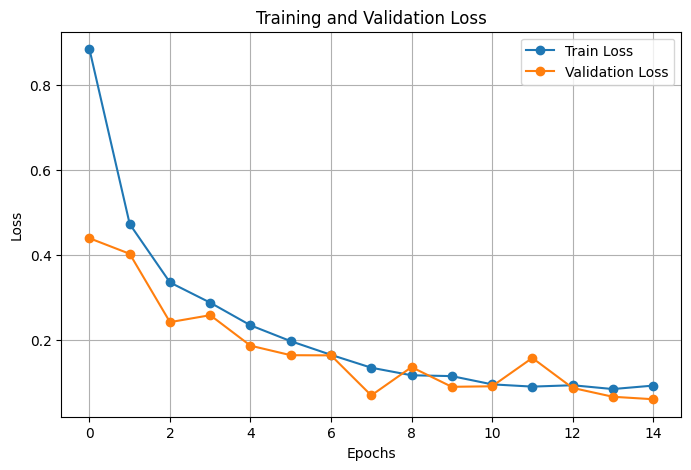

50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step
Classification Report:
              precision    recall  f1-score   support

       N_New       1.00      0.99      0.99       321
      AS_New       0.99      0.98      0.99       323
      MR_New       0.96      0.97      0.97       320
      MS_New       0.99      0.97      0.98       295
     MVP_New       0.97      0.99      0.98       341

    accuracy                           0.98      1600
   macro avg       0.98      0.98      0.98      1600
weighted avg       0.98      0.98      0.98      1600



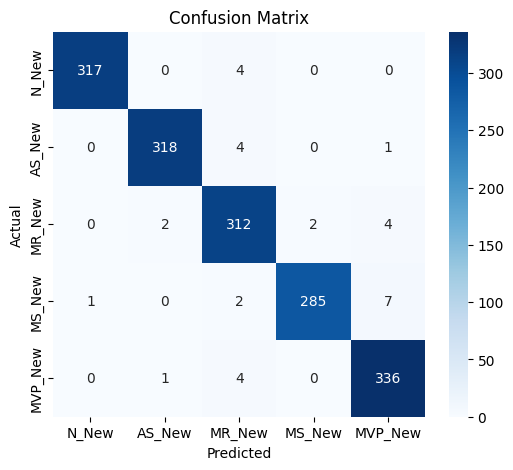

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import os
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Plot training & validation accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.grid()
plt.show()

# ✅ Plot training & validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.grid()
plt.show()

# Generate predictions
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=labels_dict.keys()))

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels_dict.keys(), yticklabels=labels_dict.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Function to predict a single audio file
def predict_audio(file_path, model_path="C:\\Users\\HOME\\Desktop\\Heart Sounds\\heart_sound_lstm_model.h5",
                  sr=22050, n_mfcc=40, max_pad_length=100):
    model = load_model(model_path)

    # Extract features
    audio, sr = librosa.load(file_path, sr=sr)
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)

    # Pad/truncate to match model input shape
    if mfccs.shape[1] < max_pad_length:
        pad_width = max_pad_length - mfccs.shape[1]
        mfccs = np.pad(mfccs, ((0, 0), (0, pad_width)), mode='constant')
    else:
        mfccs = mfccs[:, :max_pad_length]

    mfccs = mfccs.T  # Transpose to match input shape
    mfccs = np.expand_dims(mfccs, axis=0)  # Add batch dimension

    # Make prediction
    prediction = model.predict(mfccs)
    predicted_label = np.argmax(prediction)
    
    # Return class name
    return list(labels_dict.values())[predicted_label]


# **Prediction or Model testing**

In [ ]:
import numpy as np
import librosa
import sounddevice as sd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import tkinter as tk
from tkinter import filedialog, messagebox
from tensorflow.keras.models import load_model
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from pydub import AudioSegment
import os
import tempfile
import threading

# Labels and disease descriptions
labels_dict = {
    0: "Normal",
    1: "Aortic Stenosis",
    2: "Mitral Regurgitation",
    3: "Mitral Stenosis",
    4: "Mitral Valve Prolapse"
}

disease_explanation = {
    "Aortic Stenosis": "Narrowing of the aortic valve, leading to heart failure.",
    "Mitral Regurgitation": "Backflow of blood caused by a leaky mitral valve.",
    "Mitral Stenosis": "Narrowing of the mitral valve, restricting blood flow.",
    "Mitral Valve Prolapse": "Blood leakage and possible arrhythmias."
}

# Prediction function
def predict_audio(file_path, model_path="C:\\Users\\HOME\\Desktop\\Heart Sounds\\heart_sound_lstm_model.h5", sr=22050, n_mfcc=40, max_pad_length=100):
    model = load_model(model_path)
    audio, sr = librosa.load(file_path, sr=sr)
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)

    if mfccs.shape[1] < max_pad_length:
        mfccs = np.pad(mfccs, ((0, 0), (0, max_pad_length - mfccs.shape[1])), mode='constant')
    else:
        mfccs = mfccs[:, :max_pad_length]

    mfccs = mfccs.T
    mfccs = np.expand_dims(mfccs, axis=0)
    prediction = model.predict(mfccs)
    predicted_class = np.argmax(prediction)
    confidence_score = np.max(prediction)
    predicted_class_name = labels_dict.get(predicted_class, "Unknown")
    return predicted_class, predicted_class_name, confidence_score

# Display full waveform
def display_full_waveform(file_path):
    global ani, line, fig, audio_data, sr, time_data, pointer, canvas

    if file_path.endswith(".mp3"):
        audio = AudioSegment.from_mp3(file_path)
        temp_wav = tempfile.NamedTemporaryFile(delete=False, suffix=".wav")
        audio.export(temp_wav.name, format="wav")
        file_path = temp_wav.name

    audio_data, sr = librosa.load(file_path, sr=None)
    time_data = np.linspace(0, len(audio_data) / sr, len(audio_data))
    pointer = [0]
    chunk_size = int(sr * 0.05)

    for widget in plot_frame.winfo_children():
        widget.destroy()

    fig, ax = plt.subplots(figsize=(6.8, 3), dpi=100)
    line, = ax.plot([], [], color="darkred")
    ax.set_xlim(0, time_data[-1])
    ax.set_ylim(np.min(audio_data), np.max(audio_data))
    ax.set_title("🎵 Full Audio Waveform", fontsize=12)
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Amplitude")
    ax.grid(True)

    canvas = FigureCanvasTkAgg(fig, master=plot_frame)
    canvas.get_tk_widget().pack()
    canvas.draw()

    def update(frame):
        end = pointer[0] + chunk_size
        if end <= len(audio_data):
            x = time_data[:end]
            y = audio_data[:end]
            line.set_data(x, y)
            pointer[0] += chunk_size
        return line,

    ani = animation.FuncAnimation(fig, update, interval=50, blit=True)
    threading.Thread(target=lambda: sd.play(audio_data, sr), daemon=True).start()

# GUI handlers
def browse_file():
    file_path = filedialog.askopenfilename(filetypes=[("Audio Files", "*.mp3 *.wav")])
    if file_path:
        entry_var.set(file_path)
        display_full_waveform(file_path)
        predict_button.config(state=tk.NORMAL)

def run_prediction():
    file_path = entry_var.get()
    if not os.path.exists(file_path):
        messagebox.showerror("Error", "Audio file not found.")
        return
    try:
        predicted_class, predicted_name, confidence = predict_audio(file_path)
        result_text.delete(1.0, tk.END)

        result_text.insert(tk.END, f"🧠 Prediction Result\n", ("header", "center"))
        result_text.insert(tk.END, f"\n📌 Class Index: {predicted_class}\n", ("label", "center"))
        result_text.insert(tk.END, f"📌 Class Name: {predicted_name}\n", ("label", "center"))
        result_text.insert(tk.END, f"📈 Confidence: {confidence:.2f}\n", ("label", "center"))

        if predicted_name == "Normal":
            result_text.insert(tk.END, "\n✅ Heart is normal. No consultation needed.\n", ("normal", "center"))
        else:
            reason = disease_explanation.get(predicted_name, "No explanation available.")
            result_text.insert(tk.END, f"\n🚨 Suggestion:\n{reason}", ("alert", "center"))
    except Exception as e:
        messagebox.showerror("Prediction Error", str(e))

# GUI setup
root = tk.Tk()
root.title("🫀 Intelligent Heart Sound Analyzer")
root.geometry("750x740")
root.configure(bg="#fef7f2")

tk.Label(root, text="AI-Based Heart Disease Prediction with Full Audio Display",
         font=("Lucida Bright", 20, "bold"), bg="#fef7f2", fg="#4B0082").pack(pady=15)

frame = tk.Frame(root, bg="#fef7f2")
frame.pack(pady=5)

entry_var = tk.StringVar()
tk.Entry(frame, textvariable=entry_var, width=55, font=("Segoe UI", 12)).pack(side=tk.LEFT, padx=5)

tk.Button(frame, text="🎧 Select Audio", command=browse_file,
          font=("Segoe UI", 12), bg="#800000", fg="white").pack(side=tk.LEFT)

plot_frame = tk.Frame(root, bg="#fef7f2")
plot_frame.pack(pady=10)

predict_button = tk.Button(root, text="🧠 Run Prediction", command=run_prediction,
                           bg="#483D8B", fg="white", font=("Segoe UI", 14, "bold"), state=tk.DISABLED)
predict_button.pack(pady=10)

result_text = tk.Text(root, height=10, width=80, font=("Courier New", 12), wrap=tk.WORD,
                      bg="#ffffff", fg="#000000", bd=3, relief=tk.RIDGE)

# Tag configs
result_text.tag_config("header", foreground="navy", font=("Segoe UI", 14, "bold"))
result_text.tag_config("label", font=("Segoe UI", 12, "bold"))
result_text.tag_config("alert", foreground="red", font=("Segoe UI", 12, "bold"))
result_text.tag_config("normal", foreground="green", font=("Segoe UI", 12, "bold"))
result_text.tag_config("center", justify='center')

result_text.pack(pady=10)

root.mainloop()
